In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-aapl-historical-stock-data/HistoricalQuotes.csv


In [2]:
# Import libraries

import matplotlib.pyplot as plt
import datetime

# Import dataset

df = pd.read_csv(r'/kaggle/input/apple-aapl-historical-stock-data/HistoricalQuotes.csv', index_col='Date', parse_dates=True)

In [3]:
# Test if missing values exist

df.isna().any()

 Close/Last    False
 Volume        False
 Open          False
 High          False
 Low           False
dtype: bool

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2020-02-28 to 2010-03-01
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0    Close/Last  2518 non-null   object
 1    Volume      2518 non-null   int64 
 2    Open        2518 non-null   object
 3    High        2518 non-null   object
 4    Low         2518 non-null   object
dtypes: int64(1), object(4)
memory usage: 118.0+ KB


In [5]:
# Cleaning data

df = df.rename(columns={' Close/Last':'Close', ' Volume':'Volume', ' Open': 'Open', ' High':'High', ' Low':'Low'})
df['Close'] = df['Close'].str.replace('$', '').astype('float')
df['Open'] = df['Open'].str.replace('$', '').astype('float')
df['High'] = df['High'].str.replace('$', '').astype('float')
df['Low'] = df['Low'].str.replace('$', '').astype('float')
df.head()

,Close,Volume,Open,High,Low
Date,,,,,
2020-02-28,273.36,106721200,257.26,278.41,256.37
2020-02-27,273.52,80151380,281.10,286.00,272.96
2020-02-26,292.65,49678430,286.53,297.88,286.50
2020-02-25,288.08,57668360,300.95,302.53,286.13
2020-02-24,298.18,55548830,297.26,304.18,289.23


In [6]:
df.dtypes

Close     float64
Volume      int64
Open      float64
High      float64
Low       float64
dtype: object

In [7]:
# Split training and testing datasets

df_test = df.head(40)
df = df[40:]

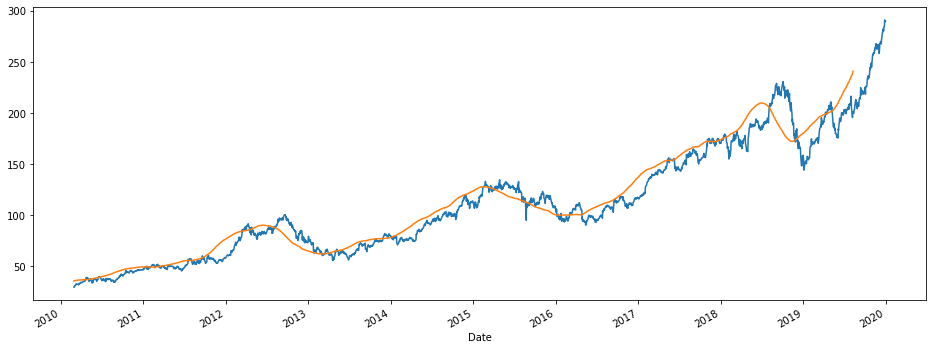

In [8]:
# Moving average

df['Open'].plot(figsize=(16, 6))
df.rolling(100).mean()['Open'].plot()

In [9]:
training_df = df['Open']
training_df = pd.DataFrame(training_df)

In [10]:
# Feature scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_df_scaled = sc.fit_transform(training_df)

In [11]:
# Create structure with 60 timesteps and 1 output

X_train = []
y_train = []
for i in range(60, 2477):
    X_train.append(training_df_scaled[i-60:i, 0])
    y_train.append(training_df_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


# Reshape

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.99545328],
        [0.99365752],
        [1.        ],
        ...,
        [0.75512671],
        [0.75050358],
        [0.75222293]],

       [[0.99365752],
        [1.        ],
        [0.97592914],
        ...,
        [0.75050358],
        [0.75222293],
        [0.74981584]],

       [[1.        ],
        [0.97592914],
        [0.97543243],
        ...,
        [0.75222293],
        [0.74981584],
        [0.72226807]],

       ...,

       [[0.02927705],
        [0.02448045],
        [0.02419657],
        ...,
        [0.00685561],
        [0.00778368],
        [0.00501629]],

       [[0.02448045],
        [0.02419657],
        [0.01833971],
        ...,
        [0.00778368],
        [0.00501629],
        [0.00192682]],

       [[0.02419657],
        [0.01833971],
        [0.02266826],
        ...,
        [0.00501629],
        [0.00192682],
        [0.00174151]]])

In [12]:
# Import Keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [13]:
# Initialize RNN

regressor = Sequential()

In [14]:
# First LSTM layer

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


# Second LSTM layer

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


# Thirs LSTM layer

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


# Fourth LSTM layer

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

              
# Output layer

regressor.add(Dense(units = 1))

In [15]:
# Compile RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


# Fit RNN

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
76/76 [==============================] - 9s 120ms/step - loss: 0.0089
Epoch 2/100
76/76 [==============================] - 9s 118ms/step - loss: 0.0018
Epoch 3/100
76/76 [==============================] - 9s 119ms/step - loss: 0.0018
Epoch 4/100
76/76 [==============================] - 9s 119ms/step - loss: 0.0017
Epoch 5/100
76/76 [==============================] - 9s 123ms/step - loss: 0.0014
Epoch 6/100
76/76 [==============================] - 9s 121ms/step - loss: 0.0015
Epoch 7/100
76/76 [==============================] - 9s 120ms/step - loss: 0.0013
Epoch 8/100
76/76 [==============================] - 9s 118ms/step - loss: 0.0013
Epoch 9/100
76/76 [==============================] - 9s 120ms/step - loss: 0.0013
Epoch 10/100
76/76 [==============================] - 9s 121ms/step - loss: 0.0012
Epoch 11/100
76/76 [==============================] - 9s 121ms/step - loss: 0.0012
Epoch 12/100
76/76 [==============================] - 9s 121ms/step - loss: 0.0013
Epoch 13/100


In [16]:
real_stock_price = df_test['Open'].values
real_stock_price

array([257.26 , 281.1  , 286.53 , 300.95 , 297.26 , 318.62 , 322.63 ,
       320.   , 315.36 , 324.74 , 324.19 , 321.47 , 323.6  , 314.18 ,
       322.37 , 322.57 , 323.52 , 315.31 , 304.3  , 320.93 , 320.544,
       324.45 , 312.6  , 310.06 , 320.25 , 317.92 , 318.58 , 317.19 ,
       316.27 , 313.59 , 311.85 , 316.7  , 311.64 , 310.6  , 307.235,
       297.16 , 299.84 , 293.79 , 297.15 , 296.24 ])

In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2020-02-28 to 2020-01-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   40 non-null     float64
 1   Volume  40 non-null     int64  
 2   Open    40 non-null     float64
 3   High    40 non-null     float64
 4   Low     40 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.9 KB


In [18]:
test_set = df_test['Open']
test_set = pd.DataFrame(test_set)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2020-02-28 to 2020-01-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    40 non-null     float64
dtypes: float64(1)
memory usage: 640.0 bytes


In [19]:
df_total = pd.concat((df['Open'], df_test['Open']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [20]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price = predicted_stock_price.values
predicted_stock_price

array([[ 27.65353],
       [ 77.39691],
       [196.49617],
       [276.39865],
       [290.01685],
       [285.5048 ],
       [287.45377],
       [294.86948],
       [300.9668 ],
       [301.51624],
       [302.7589 ],
       [302.99   ],
       [301.5285 ],
       [300.70645],
       [297.2308 ],
       [297.2164 ],
       [298.5393 ],
       [299.90506],
       [297.72467],
       [291.88934],
       [293.22128],
       [296.87885],
       [300.73215],
       [298.4411 ],
       [294.54474],
       [295.59192],
       [297.47867],
       [298.90723],
       [298.89734],
       [298.09964],
       [296.6141 ],
       [295.1555 ],
       [296.13638],
       [295.8349 ],
       [294.80267],
       [292.87683],
       [288.30438],
       [285.8049 ],
       [283.4216 ],
       [283.22876]], dtype=float32)

In [21]:
real_stock_price

array([257.26 , 281.1  , 286.53 , 300.95 , 297.26 , 318.62 , 322.63 ,
       320.   , 315.36 , 324.74 , 324.19 , 321.47 , 323.6  , 314.18 ,
       322.37 , 322.57 , 323.52 , 315.31 , 304.3  , 320.93 , 320.544,
       324.45 , 312.6  , 310.06 , 320.25 , 317.92 , 318.58 , 317.19 ,
       316.27 , 313.59 , 311.85 , 316.7  , 311.64 , 310.6  , 307.235,
       297.16 , 299.84 , 293.79 , 297.15 , 296.24 ])

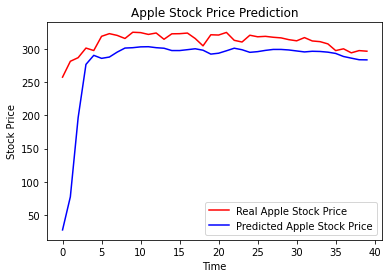

In [22]:
# Plot the results

plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()